In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [15]:

df = pd.read_csv('admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Accept
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


In [16]:

# Create 'Accept' column if it doesn't exist (threshold = 0.7)
if 'Accept' not in df.columns:
    df['Accept'] = (df['Chance of Admit'] >= 0.7).astype(int)

# Define features and target
feature_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
X = df[feature_columns]
y = df['Accept']

In [18]:
# Impute missing values for Decision Tree (though it can handle some NaNs, better to clean)
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X)
X_test_imp = imputer.transform(X)

In [20]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=2)
dt_model.fit(X_train_imp, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
# Extract and print rules
rules = export_text(dt_model, feature_names=feature_columns)
print("Decision Rules:\n")
print(rules)

# Evaluate
y_pred_dt = dt_model.predict(X_test_imp)
acc_dt = accuracy_score(y, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")


Decision Rules:

|--- CGPA <= 8.27
|   |--- TOEFL Score <= 102.50
|   |   |--- class: 0
|   |--- TOEFL Score >  102.50
|   |   |--- class: 0
|--- CGPA >  8.27
|   |--- GRE Score <= 318.50
|   |   |--- class: 1
|   |--- GRE Score >  318.50
|   |   |--- class: 1

Decision Tree Accuracy: 0.84


In [23]:
print("MLP CLASSIFIER (NeURAL NETWORK)")
# Create pipeline: impute → classify
mlp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', MLPClassifier(random_state=42, max_iter=5000, hidden_layer_sizes=(9999,)))
])


MLP CLASSIFIER (NeURAL NETWORK)


In [27]:
mlp_pipeline.fit(X_test_imp, y)

# Predict and evaluate
y_pred_mlp = mlp_pipeline.predict(X)
acc_mlp = accuracy_score(y, y_pred_mlp)
print(f"MLP Classifier Accuracy: {acc_mlp:.2f}")

MLP Classifier Accuracy: 0.71


/home/rustamshrestha/Documents/MLOPS/jupyterenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


# feature importance for linera and logistic regrssion 

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [29]:

# Load dataset
df = pd.read_csv('admission_data.csv')

# Fix column name if needed (Kaggle version has trailing space)
if 'Chance of Admit ' in df.columns:
    df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

# Create binary target for classification
df['Accept'] = (df['Chance of Admit'] >= 0.7).astype(int)



In [30]:
# Features
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
X = df[feature_cols]
y_reg = df['Chance of Admit']   # for linear regression
y_clf = df['Accept']            # for logistic regression

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imp = imputer.fit_transform(X)


In [31]:

# Standardize features (important for interpreting logistic regression coefficients fairly)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

# Split data (same split for both models)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)
_, _, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y_clf, test_size=0.2, random_state=42
)


In [33]:

# 1. LINEAR REGRESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_reg)

print("=== LINEAR REGRESSION (Predicting Chance of Admit) ===")
print("Intercept:", lin_reg.intercept_)
print("Coefficients:")
for feat, coef in zip(feature_cols, lin_reg.coef_):
    print(f"  {feat}: {coef:.4f}")


=== LINEAR REGRESSION (Predicting Chance of Admit) ===
Intercept: 0.7225660457806268
Coefficients:
  GRE Score: 0.0341
  TOEFL Score: 0.0171
  University Rating: 0.0045
  SOP: 0.0018
  LOR: 0.0159
  CGPA: 0.0685


In [34]:

# 2. LOGISTIC REGRESSION
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train_clf)

print("\n=== LOGISTIC REGRESSION (Predicting Accept/Reject) ===")
print("Intercept:", log_reg.intercept_[0])
print("Coefficients (log-odds):")
for feat, coef in zip(feature_cols, log_reg.coef_[0]):
    print(f"  {feat}: {coef:.4f}")



=== LOGISTIC REGRESSION (Predicting Accept/Reject) ===
Intercept: 1.2400695784259252
Coefficients (log-odds):
  GRE Score: 1.3711
  TOEFL Score: 0.4821
  University Rating: 0.3778
  SOP: -0.0222
  LOR: 0.4072
  CGPA: 1.3181


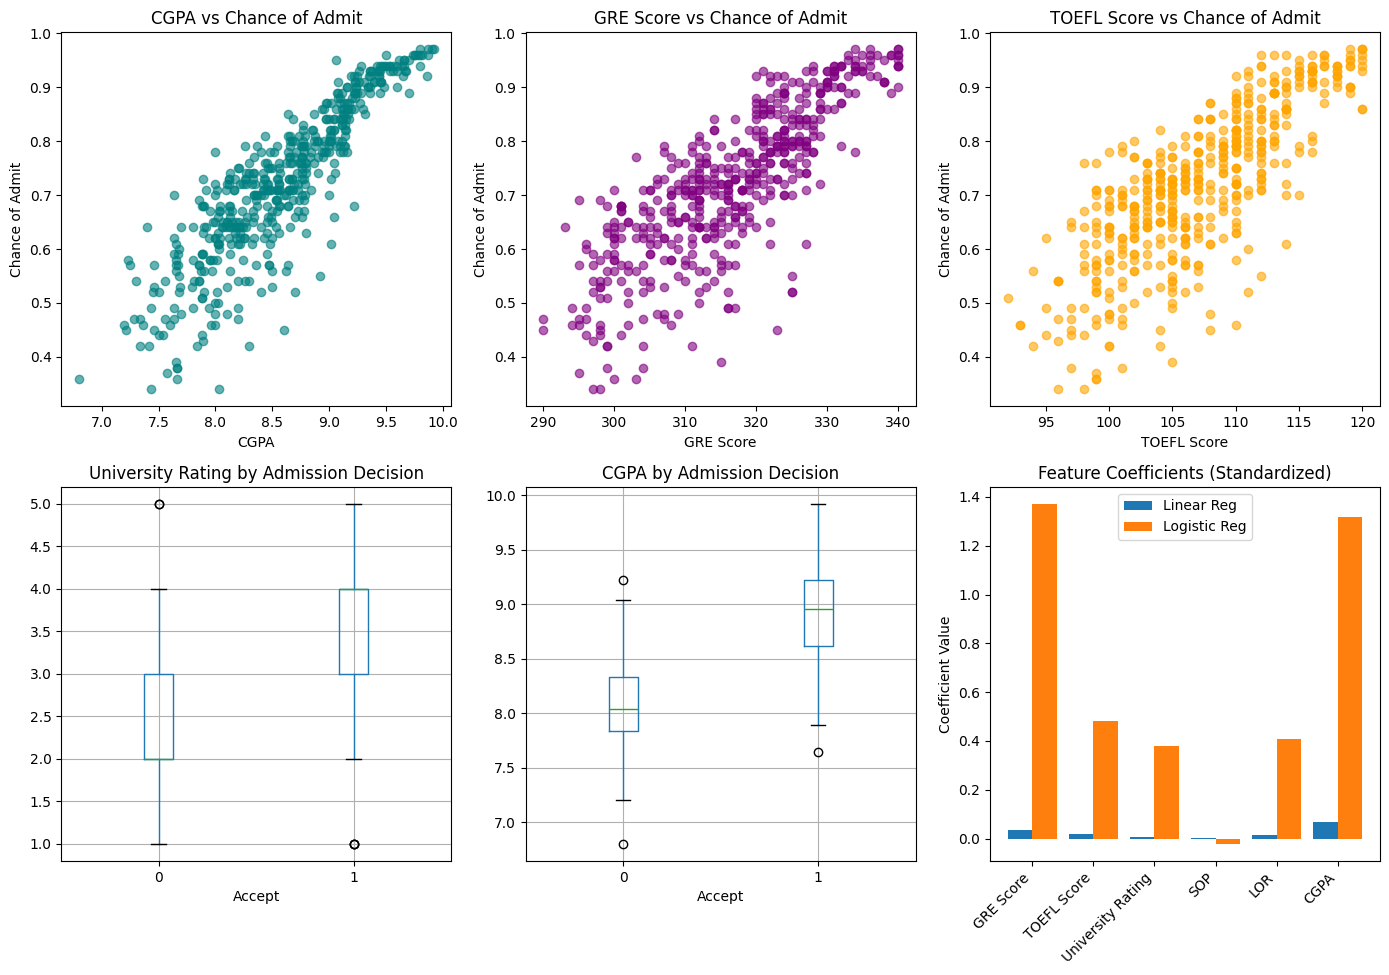

In [35]:

# 3. VISUALIZATION
plt.figure(figsize=(14, 10))

# Plot 1: CGPA vs Chance of Admit (most predictive feature)
plt.subplot(2, 3, 1)
plt.scatter(df['CGPA'], df['Chance of Admit'], alpha=0.6, color='teal')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA vs Chance of Admit')

# Plot 2: GRE Score vs Chance of Admit
plt.subplot(2, 3, 2)
plt.scatter(df['GRE Score'], df['Chance of Admit'], alpha=0.6, color='purple')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')

# Plot 3: TOEFL Score vs Chance of Admit
plt.subplot(2, 3, 3)
plt.scatter(df['TOEFL Score'], df['Chance of Admit'], alpha=0.6, color='orange')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs Chance of Admit')

# Plot 4: University Rating distribution by Accept/Reject
plt.subplot(2, 3, 4)
df.boxplot(column='University Rating', by='Accept', ax=plt.gca())
plt.title('University Rating by Admission Decision')
plt.suptitle('')  # Remove default suptitle

# Plot 5: CGPA distribution by Accept/Reject
plt.subplot(2, 3, 5)
df.boxplot(column='CGPA', by='Accept', ax=plt.gca())
plt.title('CGPA by Admission Decision')
plt.suptitle('')

# Plot 6: Coefficients comparison (standardized)
plt.subplot(2, 3, 6)
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Linear': lin_reg.coef_,
    'Logistic': log_reg.coef_[0]
})
x = np.arange(len(feature_cols))
plt.bar(x - 0.2, coef_df['Linear'], width=0.4, label='Linear Reg')
plt.bar(x + 0.2, coef_df['Logistic'], width=0.4, label='Logistic Reg')
plt.xticks(x, feature_cols, rotation=45, ha='right')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients (Standardized)')
plt.legend()

plt.tight_layout()
plt.show()

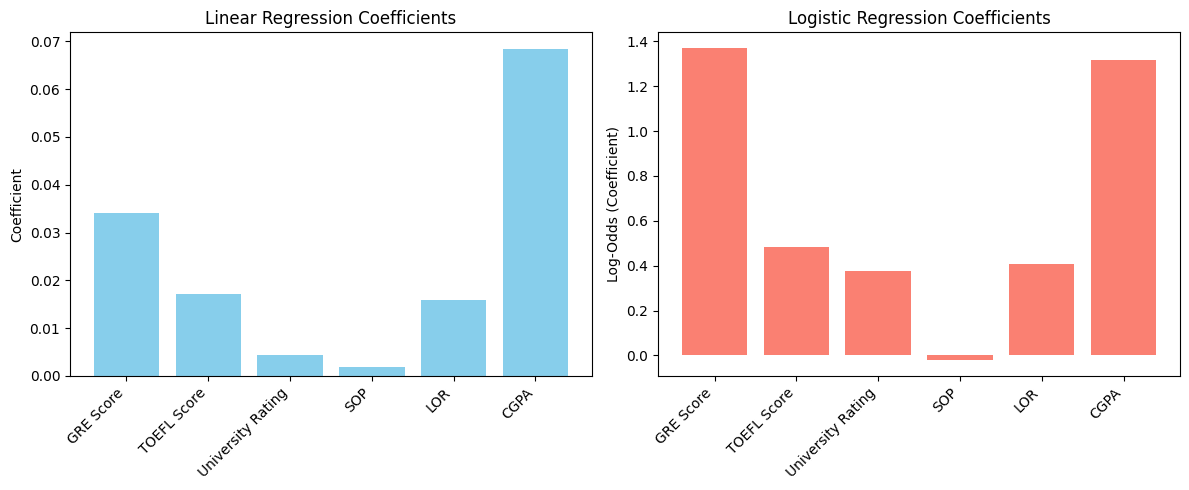

In [192]:
import matplotlib.pyplot as plt

# Plot Linear Regression coefficients
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(feature_cols, lin_reg.coef_, color='skyblue')
plt.title('Linear Regression Coefficients')
plt.ylabel('Coefficient')
plt.xticks(rotation=45, ha='right')

# Plot Logistic Regression coefficients
plt.subplot(1, 2, 2)
plt.bar(feature_cols, log_reg.coef_[0], color='salmon')  # log_reg.coef_ is 2D
plt.title('Logistic Regression Coefficients')
plt.ylabel('Log-Odds (Coefficient)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# fro tree based model 

In [36]:
X_train = df.drop(['Accept','Chance of Admit'], axis=1)
y_train = df['Accept']

In [37]:
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

In [38]:
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
print(tree_model.feature_importances_)
feature_names = X_train.columns  # ← Only works if X_train is still a DataFrame!


[0.18499767 0.10271918 0.03676587 0.05959342 0.05651287 0.55941099]


<BarContainer object of 6 artists>

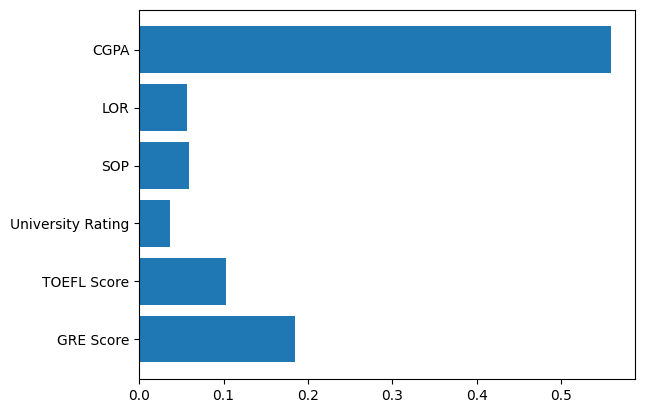

In [40]:
plt.barh(feature_names,tree_model.feature_importances_)

<BarContainer object of 6 artists>

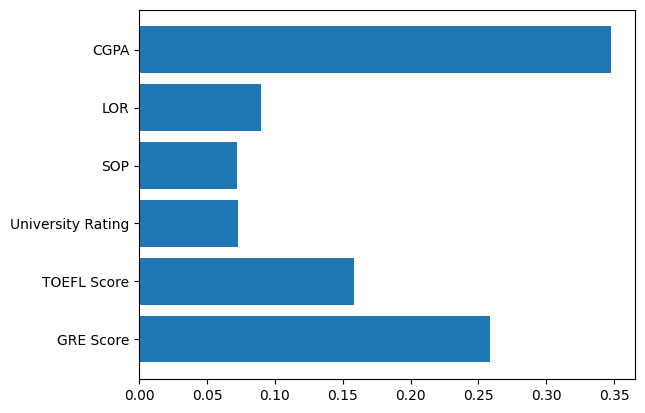

In [41]:
forest_model.fit(X_train, y_train)

plt.barh(X_train.columns,forest_model.feature_importances_)

In [42]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


# exercise for decision tree random forest with heart diisease dataset

In [47]:
data = pd.read_csv('heart.csv')

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:

feature_columns = ['age', 'sex', 'cp','trestbps',  'chol', 'fbs','fbs','exang','oldpeak','slope','ca','thal']
X = data[feature_columns]
y = data['target']

In [49]:
# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importances and names
feature_importances = model.feature_importances_
feature_names = X.columns  

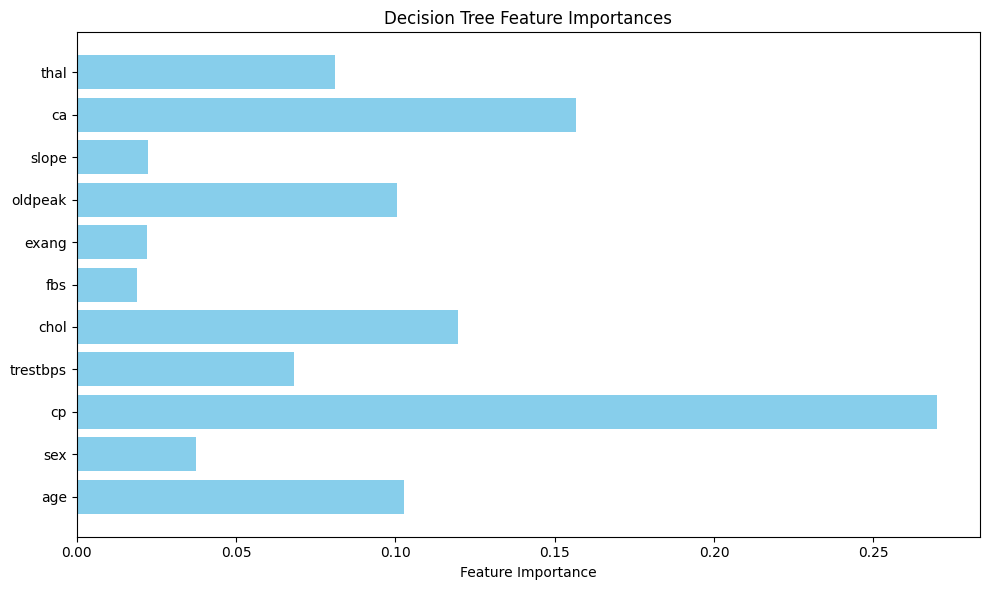

In [50]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # use same imputer on test

model = MLPClassifier(hidden_layer_sizes = (10,10))
model.fit(X_train_imputed, y_train)
result = permutation_importance(model,X_train_imputed, y_train, n_repeats = 10, random_state = 42, scoring='accuracy')
print(result.importances_mean)


/home/rustamshrestha/Documents/MLOPS/jupyterenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


[-0.066   0.2198  0.031   0.049  -0.0086 -0.019 ]


/home/rustamshrestha/Documents/MLOPS/jupyterenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


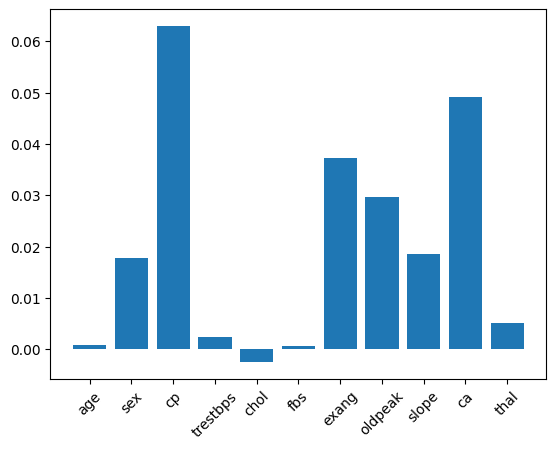

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

model = MLPClassifier(hidden_layer_sizes=(10), random_state=1)
model.fit(X, y)

# Compute the permutation importance
result = permutation_importance(model, X, y, n_repeats=10, random_state=1)

# Plot feature importances
plt.bar(X.columns, result.importances_mean)
plt.xticks(rotation=45)
plt.show()

In [66]:
def plot_importance(perm_importance, feature_names):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, perm_importance, color='salmon')
    plt.xlabel('Mean Permutation Importance')
    plt.title('Feature Permutation Importance (MLPClassifier)')
    plt.tight_layout()
    plt.show()

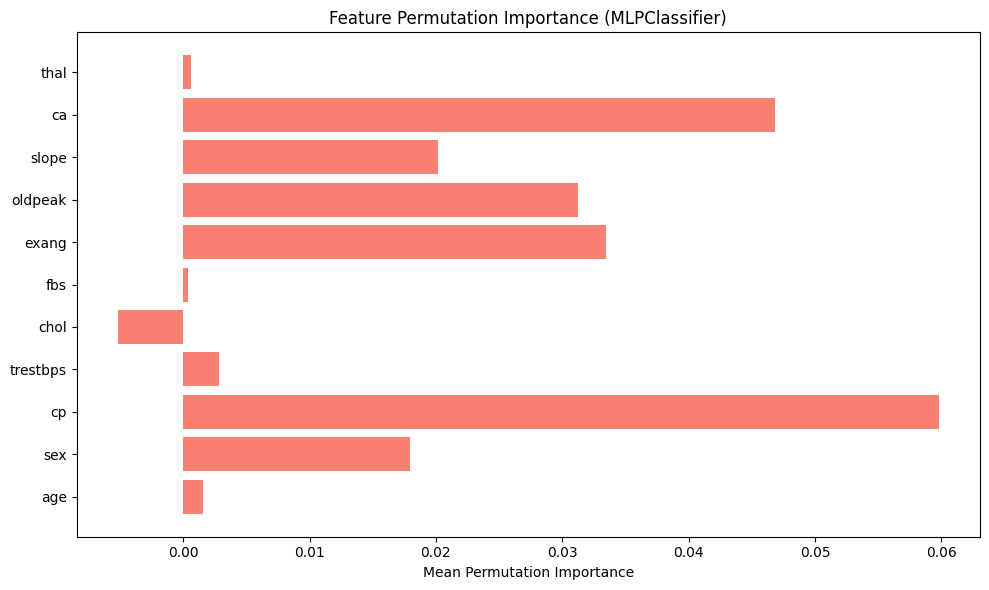

In [68]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    model, X, y,
    n_repeats=10,
# s#    random_state=1,
    scoring='accuracy'
)
# Compute the average permutation importance
avg_perm_importance = perm_importance.importances_mean
feature_names = X.columns
plot_importance(avg_perm_importance, feature_names)

In [69]:

# sidebyside comparison of coef adn perm importance

from sklearn.inspection import permutation_importance

# Extract and store model coefficients
coefficients = model.coef_[0]

# Compute permutation importance on the test set
perm_importance = permutation_importance(
    model, X, y,
    n_repeats=20,
    random_state=1,
    scoring='accuracy'
)


# Compute the average permutation importance
avg_perm_importance = perm_importance.importances_mean
plot_importances(coefficients, avg_perm_importance)

AttributeError: 'MLPClassifier' object has no attribute 'coef_'

# shap for tree based models example

In [71]:
import shap

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score

# Load data
df = pd.read_csv('admission_data.csv')


In [73]:
# Fix column name if needed (Kaggle version has trailing space)
if 'Chance of Admit ' in df.columns:
    df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

# Create binary target for classification
df['Accept'] = (df['Chance of Admit'] >= 0.7).astype(int)


In [102]:

feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
X = df[feature_cols]
y_clf = df['Accept']
y_reg = df['Chance of Admit']


In [76]:
imputer = SimpleImputer(strategy='mean')
X_imp = imputer.fit_transform(X)


In [77]:
# Split data (same split for both tasks)
X_train, X_test, y_train_clf, y_test_clf = train_test_split(
    X_imp, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)
_, _, y_train_reg, y_test_reg = train_test_split(
    X_imp, y_reg, test_size=0.2, random_state=42
)


In [78]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train_clf)
y_pred_clf = clf_rf.predict(X_test)
acc = accuracy_score(y_test_clf, y_pred_clf)
print(f"Random Forest Classification Accuracy: {acc:.2f}")


Random Forest Classification Accuracy: 0.86


In [80]:
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_train_reg)
y_pred_reg = reg_rf.predict(X_test)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Random Forest Regression R² Score: {r2:.2f}")

Random Forest Regression R² Score: -0.04


In [81]:
explainer_reg = shap.TreeExplainer(reg_rf)
shap_value_reg = explainer_reg.shap_values(X)

In [82]:
explainer_clf = shap.TreeExplainer(clf_rf)
shap_value_clf = explainer_clf.shap_values(X)

In [85]:
print(shap_value_reg)

[[ 0.00094467 -0.00674916 -0.01008287  0.00529569 -0.0111317  -0.03881739]
 [-0.02240018  0.00563065 -0.0046283  -0.00385609  0.00184914  0.01166403]
 [-0.01412709 -0.01452345 -0.0066852  -0.00329666 -0.0190853  -0.01582304]
 ...
 [-0.03924782 -0.02175076 -0.00184947 -0.00272389 -0.01135719 -0.07181161]
 [-0.03250617 -0.07493488 -0.02482865 -0.00727351 -0.05439046 -0.02850708]
 [-0.01029924  0.01116133 -0.00486035  0.00405299 -0.0069674  -0.01862808]]


In [87]:
shap_value_reg.shape

(500, 6)

In [88]:
shap_value_clf

array([[[-0.13405159,  0.13405159],
        [-0.07748116,  0.07748116],
        [-0.03768328,  0.03768328],
        [-0.0141142 ,  0.0141142 ],
        [-0.02843333,  0.02843333],
        [-0.10503644,  0.10503644]],

       [[-0.13816837,  0.13816837],
        [-0.01789237,  0.01789237],
        [-0.04498057,  0.04498057],
        [-0.00582397,  0.00582397],
        [-0.04117748,  0.04117748],
        [-0.12875725,  0.12875725]],

       [[-0.07529798,  0.07529798],
        [-0.07874927,  0.07874927],
        [-0.0364036 ,  0.0364036 ],
        [-0.04814213,  0.04814213],
        [-0.13365584,  0.13365584],
        [ 0.20544882, -0.20544882]],

       ...,

       [[-0.12992648,  0.12992648],
        [-0.07504504,  0.07504504],
        [-0.04457413,  0.04457413],
        [-0.01395043,  0.01395043],
        [-0.02932505,  0.02932505],
        [-0.10397888,  0.10397888]],

       [[-0.00461885,  0.00461885],
        [ 0.01715465, -0.01715465],
        [-0.07754699,  0.07754699],
       

In [90]:
shap_value_clf.shape # last 2 stands for two class as itsis binary clf accped not accepted

(500, 6, 2)

In [95]:
positive_values = shap_value_clf[:,:,1]

In [97]:
positive_values

array([[ 0.13405159,  0.07748116,  0.03768328,  0.0141142 ,  0.02843333,
         0.10503644],
       [ 0.13816837,  0.01789237,  0.04498057,  0.00582397,  0.04117748,
         0.12875725],
       [ 0.07529798,  0.07874927,  0.0364036 ,  0.04814213,  0.13365584,
        -0.20544882],
       ...,
       [ 0.12992648,  0.07504504,  0.04457413,  0.01395043,  0.02932505,
         0.10397888],
       [ 0.00461885, -0.01715465,  0.07754699,  0.02946201,  0.13728652,
         0.11504028],
       [ 0.12203482,  0.07595795,  0.03347143,  0.0141731 ,  0.02740403,
         0.10375866]], shape=(500, 6))

# to gauge aggregate feature impportance by taking the mean of abs shap value accross dataset

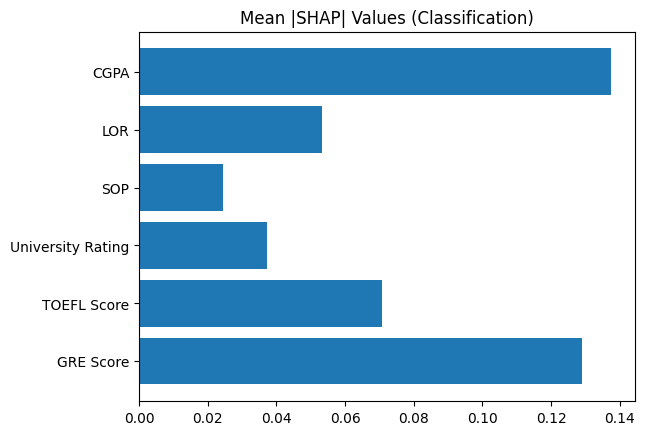

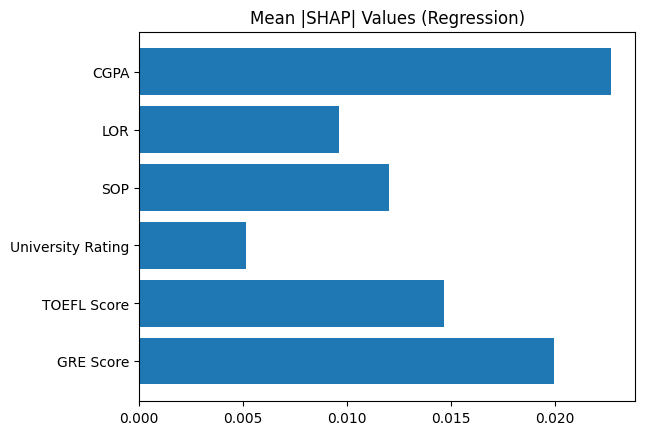

In [109]:
mean_shap_values_clf = np.abs(shap_value_clf[:,:,1]).mean(axis = 0)
mean_shap_values_reg = np.abs(shap_value_reg).mean(axis=0)

# Plot using feature_names, NOT X_train.columns
plt.barh(feature_cols, mean_shap_values_clf)
plt.title('Mean |SHAP| Values (Classification)')
plt.show()

plt.barh(feature_cols, mean_shap_values_reg)
plt.title('Mean |SHAP| Values (Regression)')
plt.show()